In [10]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import optuna.visualization.matplotlib as opm
import optuna.visualization as opv

import plotly.io as pio
import optuna
from optuna.importance import get_param_importances
from pathlib import Path as pt
from loguru import logger
from typing import Any

In [9]:
%matplotlib inline

In [4]:
optuna_storage_file = pt('/Users/aravindhnivas/Library/CloudStorage/OneDrive-MassachusettsInstituteofTechnology/ML properties/Analysed/[PHYSICAL CONSTANTS OF ORGANIC COMPOUNDS]/tmp_C_processed_data/optuna/optuna_tmp_C.db')
storage = f'sqlite:///{optuna_storage_file}'
optuna_storage_file.exists(), storage

(True,
 'sqlite:////Users/aravindhnivas/Library/CloudStorage/OneDrive-MassachusettsInstituteofTechnology/ML properties/Analysed/[PHYSICAL CONSTANTS OF ORGANIC COMPOUNDS]/tmp_C_processed_data/optuna/optuna_tmp_C.db')

In [5]:
existing_studies = optuna.study.get_all_study_summaries(storage=storage)
for s in existing_studies:
    print(s.study_name)

tmpC_topelements_lgbm_mol2vec_embeddings_pretrained_model
tmpC_topelements_lgbm_mol2vec_embeddings_pretrained_model_1
tmpC_topelements_xgboost_mol2vec_embeddings_pretrained_model
tmpC_topelements_catboost_mol2vec_embeddings_pretrained_model
tmpC_topelements_lgbm_mol2vec_embeddings_pretrained_model_2


In [6]:
study_name = 'tmpC_topelements_lgbm_mol2vec_embeddings_pretrained_model'
study = optuna.load_study(study_name=study_name, storage=storage)

study.best_params

{'n_estimators': 120,
 'learning_rate': 0.04007607434405443,
 'subsample': 0.5136060355997997,
 'colsample_bytree': 0.6623465944665253,
 'num_leaves': 255,
 'min_child_samples': 97}

In [7]:
importances_fanova = get_param_importances(study)  # default method is "fanova"
importances_mdi = get_param_importances(
    study, evaluator=optuna.importance.MeanDecreaseImpurityImportanceEvaluator()
)

logger.info("Importances from get_param_importances (fanova):")
for param, importance in importances_fanova.items():
    logger.info(f"{param}: {importance}")

logger.info("\nImportances from get_param_importances (MDI):")
for param, importance in importances_mdi.items():
    logger.info(f"{param}: {importance}")

# Save both importance methods to a CSV file
df_importance = pd.DataFrame(
    {
        "Parameter": importances_fanova.keys(),
        "Importance (fanova)": importances_fanova.values(),
        "Importance (MDI)": [
            importances_mdi.get(param, 0) for param in importances_fanova.keys()
        ],
    }
)
df_importance = df_importance.sort_values("Importance (fanova)", ascending=False)

pre_trained_loc = pt('/Users/aravindhnivas/Documents/test-codes/umda')
grid_search_name = 'tmpC_topelements_lgbm_mol2vec_embeddings_pretrained_model'

# Save the hyperparameter importance to a CSV file
savefile = pre_trained_loc / f"{grid_search_name}.hyperparameter_importance.csv"
logger.info(f"Saving importance to {savefile.name}")
df_importance.to_csv(savefile, index=False)
logger.success(f"hyperparameter_importance saved to {savefile.name}")

# save all optuna figures to a folder
optuna_figures_folder = pre_trained_loc / "optuna_figures"
if not optuna_figures_folder.exists():
    optuna_figures_folder.mkdir(parents=True)

def save_figure(fig, filename, formats=["html", "png", "svg"]):
    for fmt in formats:
        full_filename = optuna_figures_folder / f"{filename}.{fmt}"
        if fmt == "html":
            pio.write_html(fig, file=full_filename)
        else:
            pio.write_image(fig, file=full_filename)
        logger.info(f"Saved: {full_filename}")

2024-10-17 20:26:12.266 | INFO     | __main__:<module>:6 - Importances from get_param_importances (fanova):
2024-10-17 20:26:12.266 | INFO     | __main__:<module>:8 - colsample_bytree: 0.3769029041904497
2024-10-17 20:26:12.266 | INFO     | __main__:<module>:8 - learning_rate: 0.3517567728257593
2024-10-17 20:26:12.267 | INFO     | __main__:<module>:8 - n_estimators: 0.18809836487348983
2024-10-17 20:26:12.267 | INFO     | __main__:<module>:8 - min_child_samples: 0.039581533258846176
2024-10-17 20:26:12.267 | INFO     | __main__:<module>:8 - num_leaves: 0.03315779542159939
2024-10-17 20:26:12.267 | INFO     | __main__:<module>:8 - subsample: 0.010502629429855845
2024-10-17 20:26:12.267 | INFO     | __main__:<module>:10 - 
Importances from get_param_importances (MDI):
2024-10-17 20:26:12.268 | INFO     | __main__:<module>:12 - learning_rate: 0.4872378719498141
2024-10-17 20:26:12.268 | INFO     | __main__:<module>:12 - colsample_bytree: 0.21694794891767386
2024-10-17 20:26:12.268 | INFO

In [8]:
plots = [
    ("hyperparameter_importance", opv.plot_param_importances),
    ("optimization_history", opv.plot_optimization_history),
    ("parallel_coordinate", opv.plot_parallel_coordinate),
    ("slice_plot", opv.plot_slice),
    ("intermediate_values", opv.plot_intermediate_values),
    ("edf", opv.plot_edf),
    ("contour", opv.plot_contour),
    ("timeline", opv.plot_timeline),
]

mplots = [
    ("hyperparameter_importance", opm.plot_param_importances),
    ("optimization_history", opm.plot_optimization_history),
    ("parallel_coordinate", opm.plot_parallel_coordinate),
    ("slice_plot", opm.plot_slice),
    # ("intermediate_values", opm.plot_intermediate_values),
    ("edf", opm.plot_edf),
    ("contour", opm.plot_contour),
    ("timeline", opm.plot_timeline),
]

In [41]:
for name, plot_func in plots:
    try:
        fig = plot_func(study)
        save_figure(fig, name)
    except Exception as e:
        logger.error(f"Could not generate {name} plot: {str(e)}")
logger.success("All figures have been saved in the 'optuna'")

2024-10-17 17:20:21.997 | INFO     | __main__:save_figure:47 - Saved: /Users/aravindhnivas/Documents/test-codes/umda/optuna_figures/hyperparameter_importance.html
2024-10-17 17:20:22.044 | INFO     | __main__:save_figure:47 - Saved: /Users/aravindhnivas/Documents/test-codes/umda/optuna_figures/hyperparameter_importance.png
2024-10-17 17:20:22.058 | INFO     | __main__:save_figure:47 - Saved: /Users/aravindhnivas/Documents/test-codes/umda/optuna_figures/hyperparameter_importance.svg
2024-10-17 17:20:22.087 | INFO     | __main__:save_figure:47 - Saved: /Users/aravindhnivas/Documents/test-codes/umda/optuna_figures/optimization_history.html
2024-10-17 17:20:22.111 | INFO     | __main__:save_figure:47 - Saved: /Users/aravindhnivas/Documents/test-codes/umda/optuna_figures/optimization_history.png
2024-10-17 17:20:22.126 | INFO     | __main__:save_figure:47 - Saved: /Users/aravindhnivas/Documents/test-codes/umda/optuna_figures/optimization_history.svg
2024-10-17 17:20:22.141 | INFO     | __ma

In [62]:
figsize = (12, 8)

/var/folders/f4/6vm5j6k935ngrw8yrhysj__40000gn/T/ipykernel_70731/3879139982.py:4: ExperimentalWarning:

plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.

/var/folders/f4/6vm5j6k935ngrw8yrhysj__40000gn/T/ipykernel_70731/3879139982.py:4: ExperimentalWarning:

plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.

/var/folders/f4/6vm5j6k935ngrw8yrhysj__40000gn/T/ipykernel_70731/3879139982.py:4: ExperimentalWarning:

plot_parallel_coordinate is experimental (supported from v2.2.0). The interface can change in the future.

/var/folders/f4/6vm5j6k935ngrw8yrhysj__40000gn/T/ipykernel_70731/3879139982.py:4: ExperimentalWarning:

plot_slice is experimental (supported from v2.2.0). The interface can change in the future.

/var/folders/f4/6vm5j6k935ngrw8yrhysj__40000gn/T/ipykernel_70731/3879139982.py:4: ExperimentalWarning:

plot_edf is experimental (supported from v2.2.0). The interface can

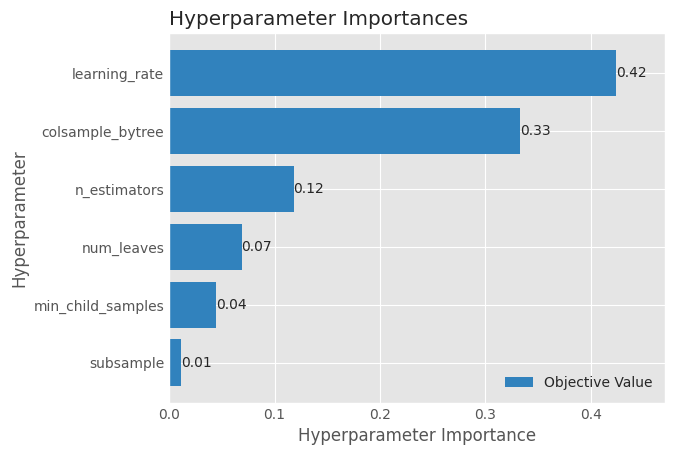

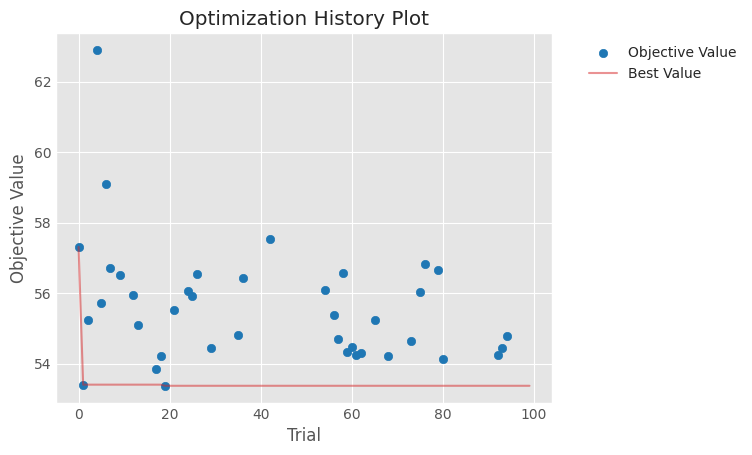

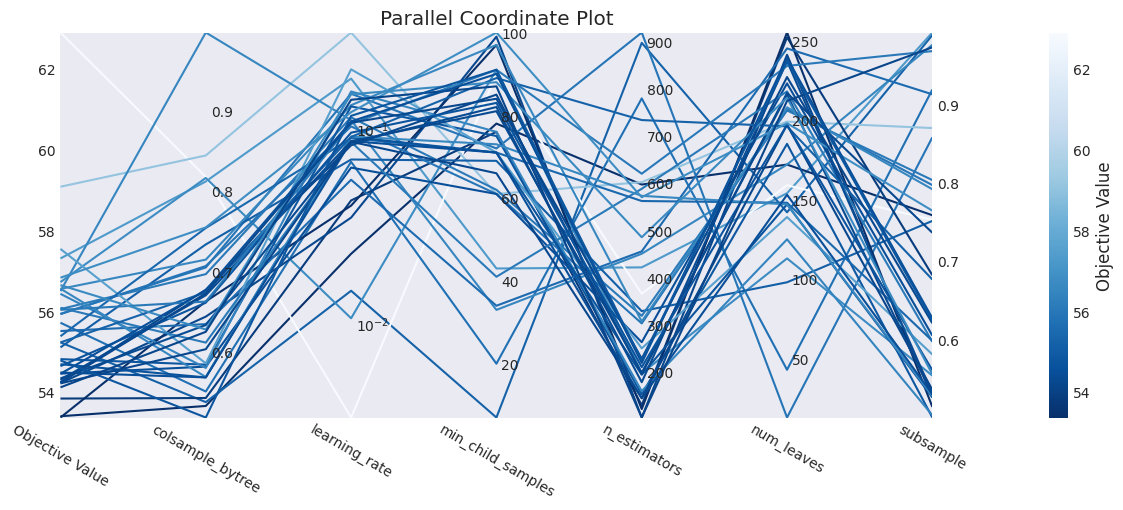

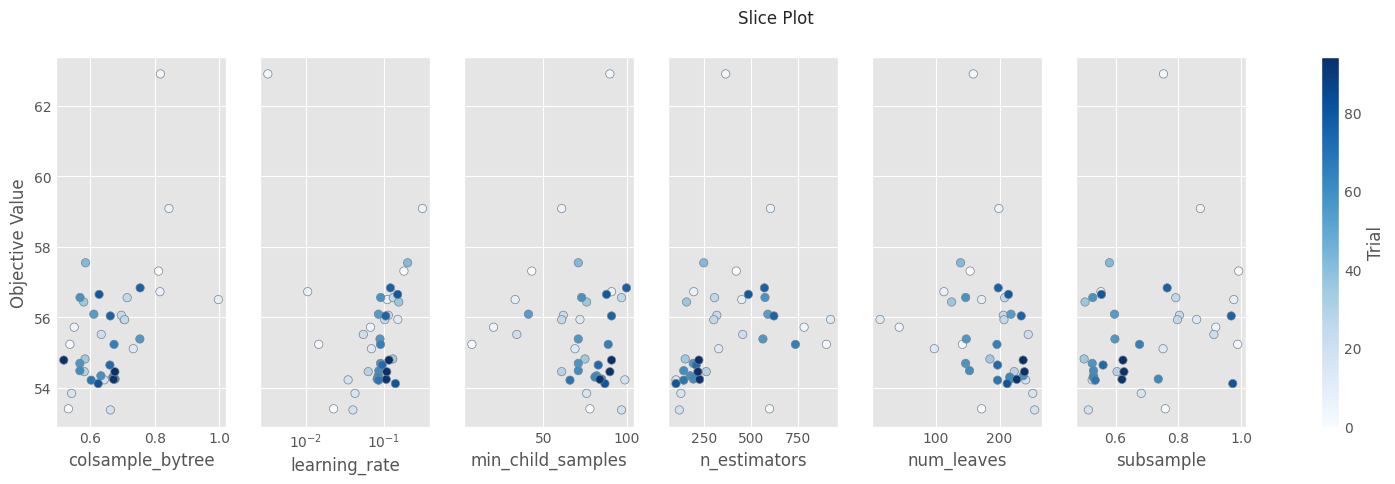

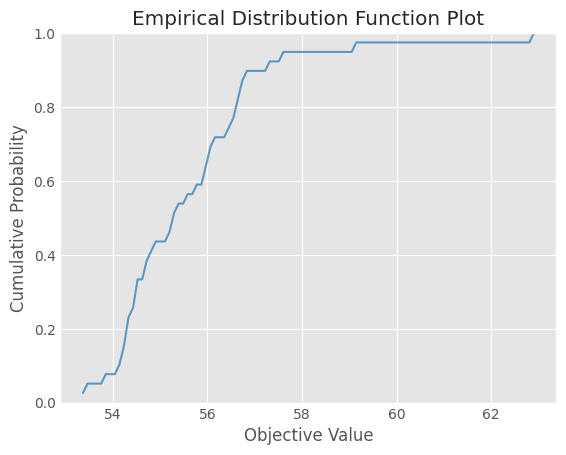

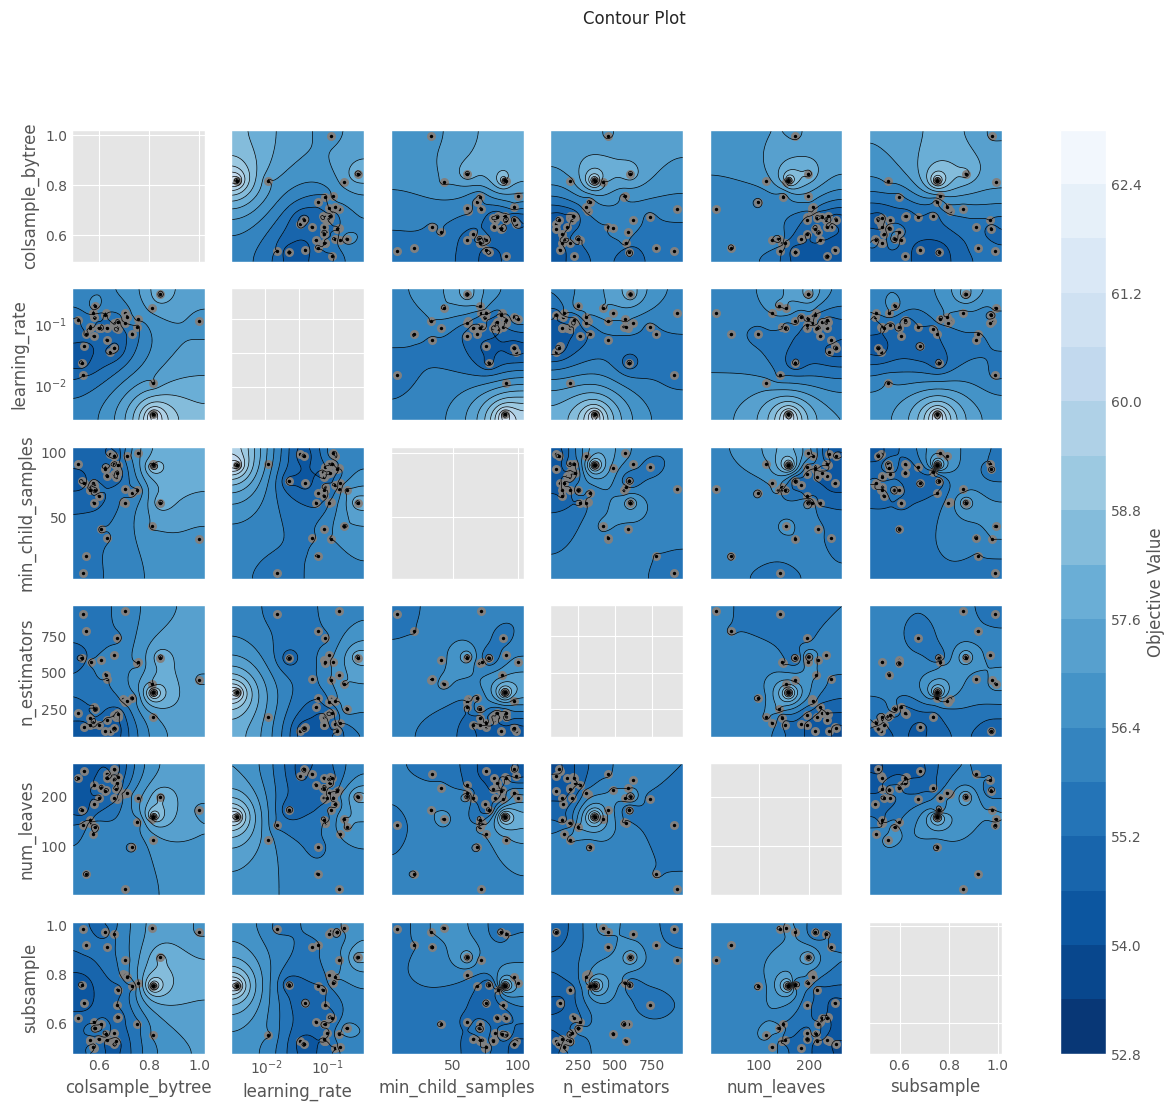

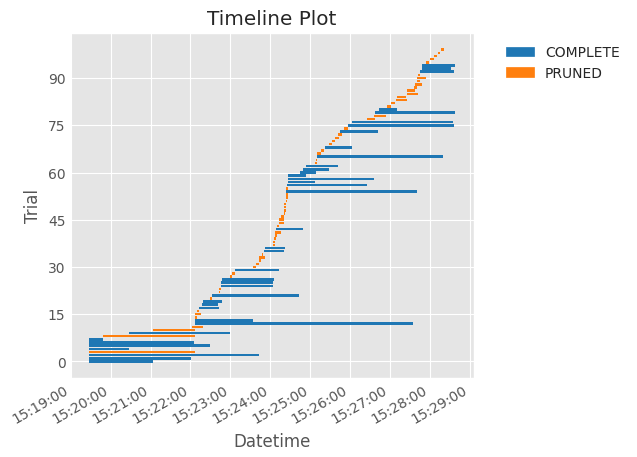

In [153]:
for name, plot_func in mplots:
    try:
        with plt.style.context('seaborn-v0_8-dark'):
            ax = plot_func(study)
            if isinstance(ax, np.ndarray):
                if ax.ndim == 1:
                    fig = ax[0].get_figure()
                elif ax.ndim == 2:
                    fig = ax[0, 0].get_figure()
            else:
                fig = ax.get_figure()
            
            if name == 'contour':
                fig.set_size_inches((15, 12))
            elif name == 'parallel_coordinate':
                fig.set_size_inches((15, 5))
            fig.savefig(optuna_figures_folder / f"{name}.pdf", format='pdf', bbox_inches='tight')
    except Exception as e:
        logger.error(f"Could not generate {name} plot: {str(e)}")
# ax = opm.is_available()

In [128]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [ ]:
def get_figure(ax) -> Any:
    
    fig: plt.Figure = None
    print(f'{type(ax)=}')
    
    if isinstance(ax, plt.Axes):
        fig = ax.get_figure()
        ax.set_title('')
    elif isinstance(ax, np.ndarray):
        print(f'{ax.ndim=}')
        ax0 = ax.flatten()[0]
        if isinstance(ax0, plt.Axes):
            fig = ax0.get_figure()
    fig.suptitle('')
    fig.set_dpi(300)
    return fig, ax

# for style in plt.style.available:
with plt.style.context('seaborn-v0_8-dark'):
    fig0, _ = get_figure(opm.plot_optimization_history(study))
    fig1, _ = get_figure(opm.plot_contour(study))
    fig1.set_size_inches((15, 12))
    fig2, _ = get_figure(opm.plot_slice(study))
    ax = opm.plot_parallel_coordinate(study)
    fig3, _ = get_figure(ax)
    fig3.set_size_inches((15, 5))
    print(f'{fig3.get_dpi()=}')
    fig3.savefig(optuna_figures_folder / "parallel_coordinate.pdf", format='pdf', bbox_inches='tight')
    plt.close('all')

/var/folders/f4/6vm5j6k935ngrw8yrhysj__40000gn/T/ipykernel_47156/2180641740.py:20: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  fig0, _ = get_figure(opm.plot_optimization_history(study))
/var/folders/f4/6vm5j6k935ngrw8yrhysj__40000gn/T/ipykernel_47156/2180641740.py:21: ExperimentalWarning: plot_contour is experimental (supported from v2.2.0). The interface can change in the future.
  fig1, _ = get_figure(opm.plot_contour(study))
[W 2024-10-17 21:11:18,841] Output figures of this Matplotlib-based `plot_contour` function would be different from those of the Plotly-based `plot_contour`.


type(ax)=<class 'matplotlib.axes._axes.Axes'>


In [50]:
fig3.get_dpi()

100.0

In [177]:
AxesArray = np.ndarray[Any, np.dtype[plt.Axes]]
# print(isinstance(ax1, np.ndarray), isinstance(ax1, plt.Axes))
# print(isinstance(ax2, np.ndarray), isinstance(ax2, plt.Axes))
# isinstance(ax2[0, 0], plt.Axes)

True False


True

In [72]:
import matplotlib.pyplot as plt
# Ensure the inline backend is used for Jupyter Notebook


In [92]:
fig = ax[0, 0].get_figure()
fig.set_size_inches((15, 12))
# fig.savefig(optuna_figures_folder / "contour_plot.pdf", bbox_inches="tight")
# fig.show()

TypeError: 'Axes' object is not subscriptable

In [73]:
# Display the figure
plt.show(fig)

In [48]:

fig = ax.get_figure()
# fig.set_size_inches(figsize)
# fig.tight_layout()


AttributeError: 'numpy.ndarray' object has no attribute 'get_figure'